#%% [markdown]

 # requirements

In [ ]:
import math
import itertools
import numpy as np
import pandas as pd
#Graph
import seaborn  as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_33083/247055711.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#%% [markdown]

 # data

In [ ]:
df = pd.read_json('../data/data_jobs.json')
df

,vacancy_name,company,location,work_modality_english,seniority,link,job_function,industries,description,apply_link,publication_date,query_keyword,country,scraping_date
0,Data Scientist,Addi,"Bogota, D.C., Capital District, Colombia",Full-time,Entry level,https://co.linkedin.com/jobs/view/data-scienti...,Engineering and Information Technology,Financial Services,About Addi\n\nWe are a technology company work...,,2025-02-18,data scientist,colombia,2025-02-19
1,"Científico de Datos - Bogotá, Colombia",ProCibernética,Colombia,Full-time,Entry level,https://co.linkedin.com/jobs/view/cient%C3%ADf...,Engineering and Information Technology,Software Development,¡Participa y se parte de ProCibernética!\n\nRo...,,2025-02-18,data scientist,colombia,2025-02-19
2,Científico de Datos / Data Scientist,SOAINT,Colombia,Full-time,Entry level,https://co.linkedin.com/jobs/view/cient%C3%ADf...,Engineering and Information Technology,IT Services and IT Consulting,¿Te apasiona el desarrollo tecnológico?🌍💙\n\nE...,,2025-02-18,data scientist,colombia,2025-02-19
3,Data Scientist (GNN),Oowlish,"Bogota, D.C., Capital District, Colombia",Full-time,Entry level,https://co.linkedin.com/jobs/view/data-scienti...,Engineering and Information Technology,IT Services and IT Consulting,"Join Our Team\n\nOowlish, one of Latin America...",,2025-02-18,data scientist,colombia,2025-02-19
4,Associate Data Scientist (Gen AI),Publicis Sapient,"Bogota, D.C., Capital District, Colombia",Full-time,Entry level,https://co.linkedin.com/jobs/view/associate-da...,Engineering and Information Technology,Business Consulting and Services,Job Description\n\nWe are seeking a talented A...,,2025-02-18,data scientist,colombia,2025-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Senior Machine Learning Engineer,EPAM Systems,"Bogota, D.C., Capital District, Colombia",Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/senior-machi...,Engineering and Information Technology,Software Development and IT Services and IT Co...,We are seeking a Senior Machine Learning Engin...,,2025-02-18,artificial intelligence engineer,colombia,2025-02-19
121,Senior Data Engineer,EPAM Systems,Colombia,Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/senior-data-...,"Information Technology, Engineering, and Busin...","Software Development, IT Services and IT Consu...",EPAM is a leading global provider of digital p...,,2025-02-18,artificial intelligence engineer,colombia,2025-02-19
122,Fullstack Engineer (AI Project) - Remote Work ...,BairesDev,"Cali, Valle del Cauca, Colombia",Full-time,Entry level,https://co.linkedin.com/jobs/view/fullstack-en...,Information Technology,IT Services and IT Consulting,"At BairesDev®, we've been leading the way in t...",,2025-02-18,artificial intelligence engineer,colombia,2025-02-19
123,Lead Data Software Engineer,EPAM Systems,"Bogota, D.C., Capital District, Colombia",Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/lead-data-so...,Engineering and Information Technology,Software Development and IT Services and IT Co...,A Lead Data Software Engineer is required to j...,,2025-02-18,artificial intelligence engineer,colombia,2025-02-19


In [ ]:
# %%

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 0 to 124
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   vacancy_name           125 non-null    object
 1   company                125 non-null    object
 2   location               125 non-null    object
 3   work_modality_english  125 non-null    object
 4   seniority              125 non-null    object
 5   link                   125 non-null    object
 6   job_function           125 non-null    object
 7   industries             125 non-null    object
 8   description            125 non-null    object
 9   apply_link             125 non-null    object
 10  publication_date       125 non-null    object
 11  query_keyword          125 non-null    object
 12  country                125 non-null    object
 13  scraping_date          125 non-null    object
dtypes: object(14)
memory usage: 14.6+ KB


In [ ]:
# %%

df_types = pd.DataFrame(df.dtypes)
object_features = df_types[df_types[0] == 'object'].index.to_list()
object_features

['vacancy_name',
 'company',
 'location',
 'work_modality_english',
 'seniority',
 'link',
 'job_function',
 'industries',
 'description',
 'apply_link',
 'publication_date',
 'query_keyword',
 'country',
 'scraping_date']

In [ ]:
# %%

float_features = df_types[df_types[0] == 'float64'].index.to_list()
float_features

[]

In [ ]:
# %%

int_features = df_types[df_types[0] == 'int64'].index.to_list()
int_features

[]

In [ ]:
# %%

bool_features = df_types[df_types[0] == 'bool'].index.to_list()
bool_features

[]

In [ ]:
#%%

df.describe().T

,count,unique,top,freq
vacancy_name,125,52,Senior Python Developer,36
company,125,23,EPAM Systems,54
location,125,15,"Bogota, D.C., Capital District, Colombia",47
work_modality_english,125,1,Full-time,125
seniority,125,3,Mid-Senior level,82
link,125,125,https://co.linkedin.com/jobs/view/data-scienti...,1
job_function,125,6,"Information Technology, Engineering, and Busin...",50
industries,125,24,IT Services and IT Consulting,50
description,125,71,"At BairesDev®, we've been leading the way in t...",13
apply_link,125,1,,125


In [ ]:
# %%

df[object_features].describe(include='all').T

,count,unique,top,freq
vacancy_name,125,52,Senior Python Developer,36
company,125,23,EPAM Systems,54
location,125,15,"Bogota, D.C., Capital District, Colombia",47
work_modality_english,125,1,Full-time,125
seniority,125,3,Mid-Senior level,82
link,125,125,https://co.linkedin.com/jobs/view/data-scienti...,1
job_function,125,6,"Information Technology, Engineering, and Busin...",50
industries,125,24,IT Services and IT Consulting,50
description,125,71,"At BairesDev®, we've been leading the way in t...",13
apply_link,125,1,,125


In [ ]:
# %%

for col in object_features:
    print(f'------>{col} : {df[col].unique()}')
    print(f'------>{col} : {df[col].value_counts(dropna=False)}')

------>vacancy_name : ['Data Scientist' 'Científico de Datos - Bogotá, Colombia'
 'Científico de Datos / Data Scientist' 'Data Scientist (GNN)'
 'Associate Data Scientist (Gen AI)' 'Desarrollador Front Cells'
 'Desarrollador de Python' 'Coders - AI Training [Remote]'
 'Senior Data Scientist' 'Lead Data Scientist'
 'Full Stack Developer (100% remote)' 'Desarrollador (a) de Voice Bots'
 'Automation Engineer - Python + Selenium Developer - Remote Work | REF#282408'
 'Senior Machine Learning Developer |LATAM| - Remote Work | REF#188338'
 'Ingeniero de Datos Junior' 'GenAI Engineer'
 'Desarrollador Backend Junior' 'Research Analyst'
 'Senior Machine Learning Developer |LATAM| - Remote Work | REF#152577'
 'Senior Machine Learning Developer |LATAM| - Remote Work | REF#152581'
 'Senior AI Specialist (Python, AWS, Azure)'
 'Senior Machine Learning & LLM Engineer - Remote Work | REF#282448'
 'Python Developer WinDifferent - Remote Work | REF#282551'
 'Senior Machine Learning Developer |LATAM| - 

#%%[markdown]

 ## null values visualization

Text(50.722222222222214, 0.5, 'Fila')

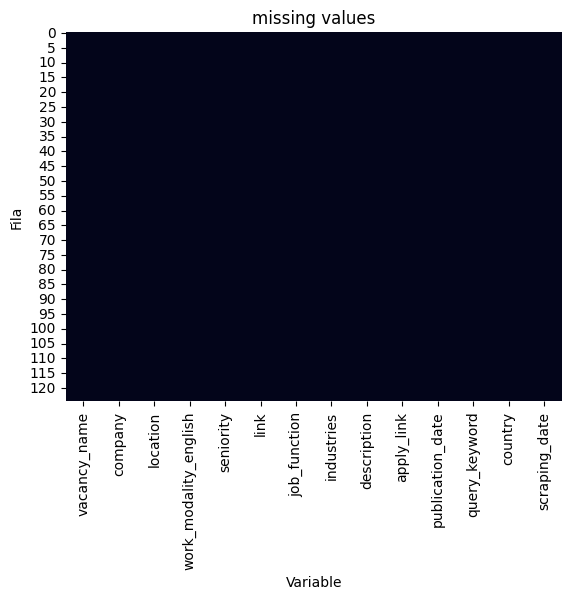

In [ ]:
# %%

sns.heatmap(df.isnull(), cbar=False)
plt.title("missing values")
plt.xlabel('Variable')
plt.ylabel('Fila')

#%%[markdown]

 # categorical variables

Text(0.5, 1.0, "'company'")

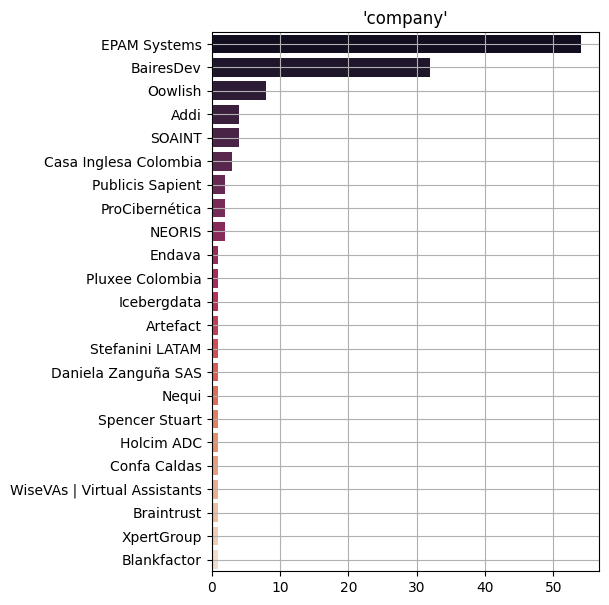

In [ ]:
plt.figure(figsize=(5,7))
a = pd.DataFrame(df['company'].value_counts())
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'company'")

Text(0.5, 1.0, "'location'")

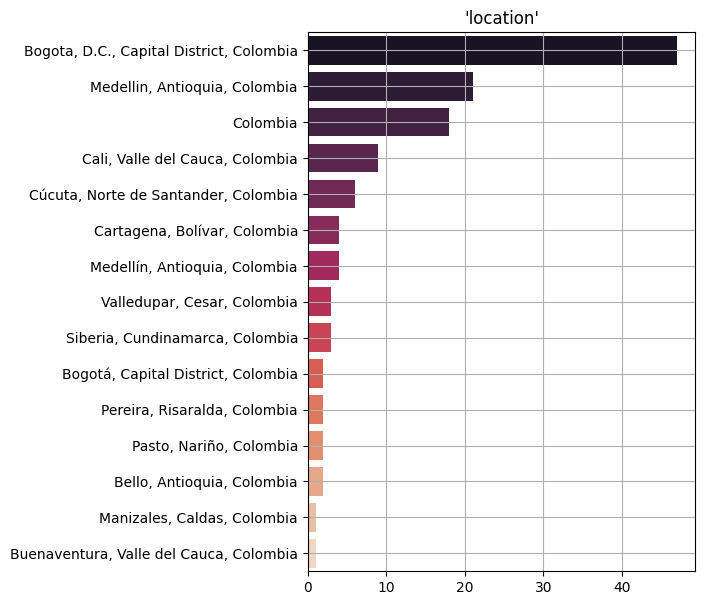

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['location'].value_counts())
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'location'")

Text(0.5, 1.0, "'work_modality_english'")

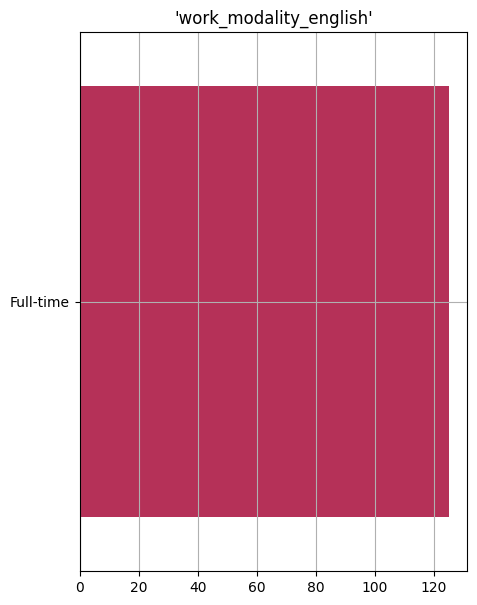

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['work_modality_english'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'work_modality_english'")

Text(0.5, 1.0, "'seniority'")

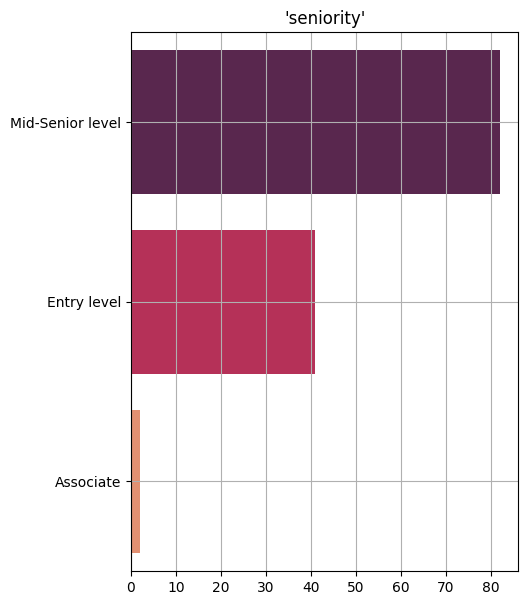

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['seniority'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'seniority'")

Text(0.5, 1.0, "'publication_date'")

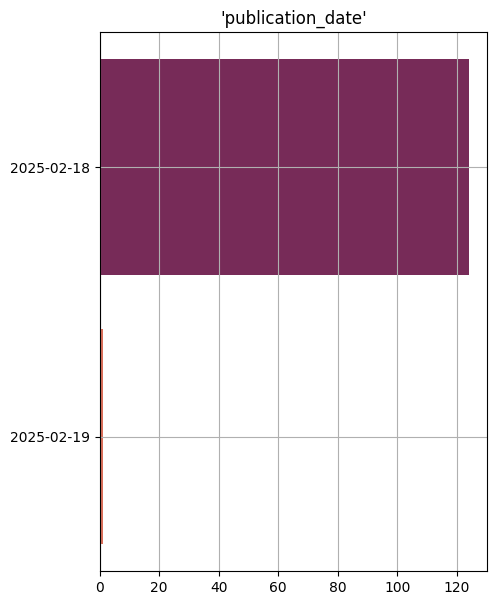

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['publication_date'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'publication_date'")

#%%[markdown]

 # knowledge based filters

In [ ]:
# %%

seniority_criteria = ["Mid-Senior level", "Associate"]
location_criteria = ["Bogota, D.C., Capital District, Colombia", "Colombia", "Bogotá, Capital District, Colombia"]
work_modality_criteria = ["Full-time"]
excluded_companies = ["BairesDev"]

In [ ]:
# %%

df_filtered = df[
    (df["seniority"].isin(seniority_criteria)) &  # Filter by seniority
    (df["location"].isin(location_criteria)) &    # Filter by location
    (df["work_modality_english"].isin(work_modality_criteria)) &  # Filter by work modality
    (~df["company"].isin(excluded_companies))     # Exclude specified companies
].copy()
df_filtered.shape

(43, 14)

#%%[markdown]

 # categorical variables

Text(0.5, 1.0, "'company'")

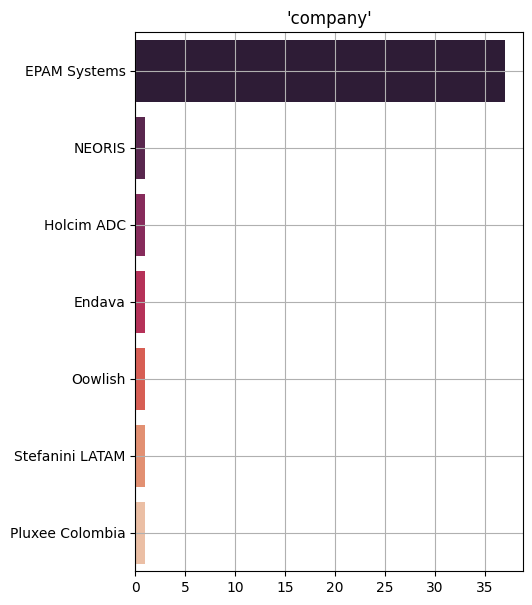

In [ ]:
plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['company'].value_counts())
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'company'")

Text(0.5, 1.0, "'location'")

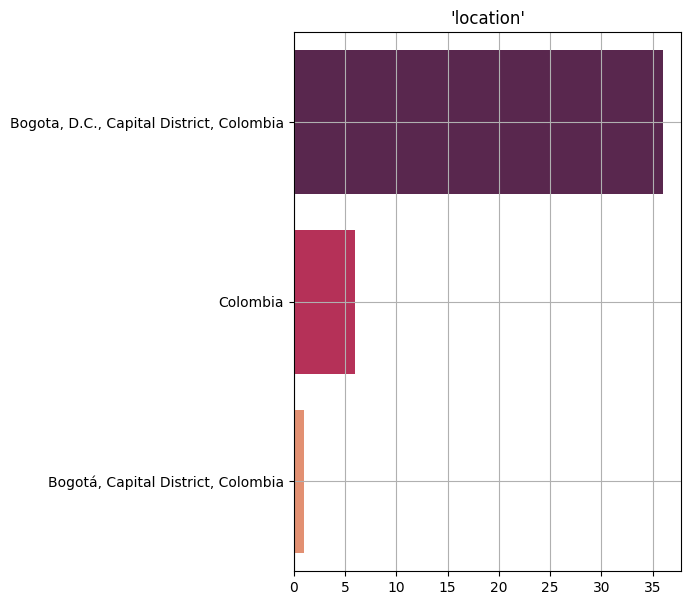

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['location'].value_counts())
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'location'")

Text(0.5, 1.0, "'work_modality_english'")

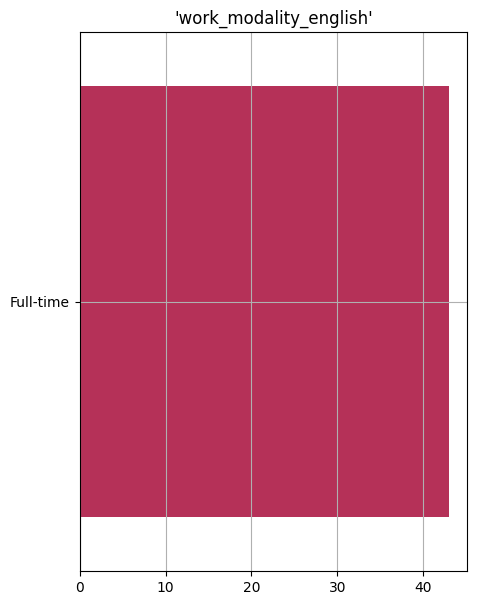

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['work_modality_english'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'work_modality_english'")

Text(0.5, 1.0, "'seniority'")

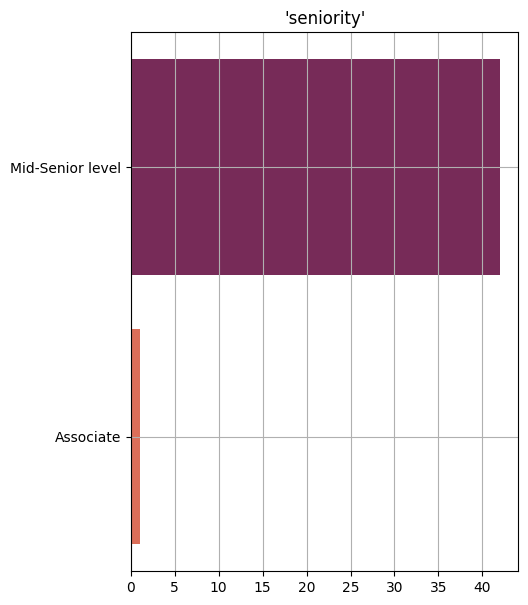

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['seniority'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'seniority'")

Text(0.5, 1.0, "'publication_date'")

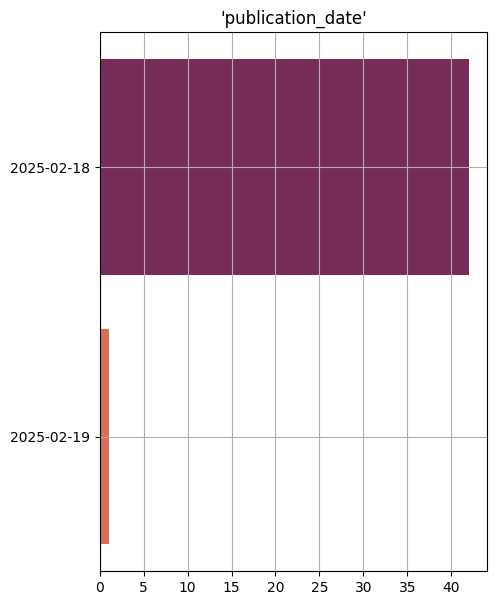

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['publication_date'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'publication_date'")